In [13]:
from collections import Counter
from pandas import ExcelWriter
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
plt.rcParams['font.sans-serif'] = ['Heiti TC']

def init(fileName):
    #filename="./_target/"+fileName+"reslut.xls"
    filename="./_target/"+fileName+".xlsx"
    file = pd.read_excel(filename)
    tmp_data=[]
    tmp_data.append(file)
    print(i + str(len(file)))
    #print(file.head())
    return file
    # print(file.head(1))
    # print(pie.keys())

    

In [14]:
def run_img(file,target):

    tend=file["property"]
    pie=Counter(tend)

    labels = ['管理', '服務', '分析']
    sizes = []
    # print( pie.items())
    for x, y in zip(pie,labels):
        # print(pie[y])
        sizes.append(pie[y])

    # Plot
    mycolors = ["#A6A5A4", "#3C3D3E", "#EEEEEE"]
    match_max=max(sizes)
    match_min=min(sizes)
    def autoSplit(match_max,match_min):
        explode=()# * it is a tuple 
        for i in sizes:
            if  i == match_max :
                explode=explode+(0.1,) # we can chain up a tuple by using +
            elif i == match_min :
                explode=explode+(0.2,)
            else :
                explode=explode+(0,)
        return explode
    explode = autoSplit(match_max,match_min)

    plt.pie(sizes, labels=labels,shadow = True,autopct='%1.1f%%',startangle=90,colors=mycolors,explode=explode)

    plt.axis('equal')
    plt.legend(title=target)
    plt.savefig("./anaylysis_img/PieChart_"+target+'.png')
    plt.show()


In [15]:
def run_chart(file,target):

    time=file['申請日']
    prop=file['property']
    time_cnt={}
    
    #print(time.year()
    for t in time:
        #year=t.split('-')
        #print(t.year)
        time_cnt[t.year]=[]

    # * =========---------===========
    for t,p in zip(time,prop):
        #year=t.split('-')
        time_cnt[t.year].append(p)
        # print(year)
    # define drawaing elements    
    y=[]
    x1=[]#服務
    x2=[]#管理
    x3=[]#分析
    
    for i in time_cnt:  
        time_cnt[i]=Counter(time_cnt[i]).most_common(3)
    time_cnt=sorted(time_cnt.items())
    #print(time_cnt)
    for i in time_cnt:      
        # print(i)
        ## the argument only have 3 objects
        y.append(i[0])
        # //print(time_cnt[i])
        for j in i[1]:
            # print (j)
            if(j[0]=="服務"):
                x1.append(j[1])
            if(j[0]=="管理"):
                x2.append(j[1])
            if(j[0]=="分析"):
                x3.append(j[1])
        ## * chekck the 0 value 
        if(len(y)!=len(x1)):
            x1.append(0)
        if(len(y)!=len(x2)):
            x2.append(0)
        if(len(y)!=len(x3)):
            x3.append(0)
    print(y)
    # ##* get the cumulative value 
    # for i in range (1,len(y)):
    #     x1[i]=x1[i-1]+x1[i]
    #     x2[i]=x2[i-1]+x2[i]
    #     x3[i]=x3[i-1]+x3[i]



    print("服務")
    print(x1) 
    print("管理")
    print(x2) 
    print("分析")
    print(x3) 
    #"#A6A5A4", "#3C3D3E", "#000000"
    ## * Drawing process
    fig =plt.figure()
    fig.suptitle(target,fontsize=20, fontweight='bold')
    ax=fig.add_subplot()
    ax.set_xlabel("years")
    ax.set_ylabel("num of pantents")
    ax.plot(y,x1,color="#00808C",linestyle='-',marker='.',label="服務")
    ax.plot(y,x2,color="#003153",linestyle='-',marker='.',label="管理")
    ax.plot(y,x3,color="#6C9FCE",linestyle='-',marker='.',label="分析")
    ax.grid(True)
    plt.legend()
    plt.savefig("./anaylysis_img/"+target+'.png')
    plt.show()

        

專利彙整1798


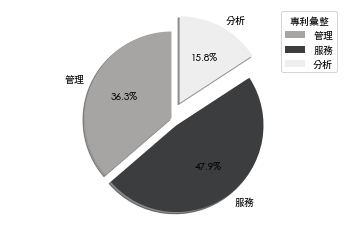

In [16]:
#for i in ["中信金控","兆豐金控","台新金控","台灣金融控股","國泰金控","第一金控","玉山金控","土地銀行","富邦金控","開發金","新光金控"]:
for i in["專利彙整"]:

    file = init(i)
    run_img(file,i)
    # run_chart(file,i)
    
    

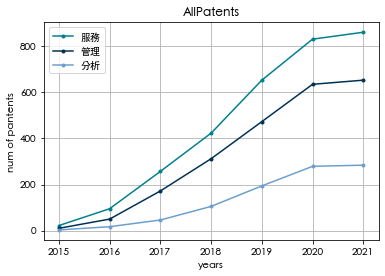

In [ ]:
y=[ 2015, 2016, 2017, 2018, 2019, 2020, 2021]

x1=[ 22, 95, 257, 423, 653, 831, 861]

x2=[ 10, 50, 172, 312, 473, 635, 653]

x3=[ 3, 17, 46, 105, 194, 279, 284]
plt.title("AllPatents")
plt.xlabel("years")
plt.ylabel("num of pantents")
plt.plot(y,x1,color="#00808C",linestyle='-',marker='.',label="服務")
plt.plot(y,x2,color="#003153",linestyle='-',marker='.',label="管理")
plt.plot(y,x3,color="#6C9FCE",linestyle='-',marker='.',label="分析")
plt.grid(True)
plt.legend()
plt.savefig("./anaylysis_img/"+"AllPatents"+'.png')